## Setting up environment and loading data

In [1]:
#Setting up environment
import pandas as pd
import os
import numpy as np
from IPython.display import Math
 
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [38]:
#Uploading data
test_data_raw = pd.read_csv("/Projects/CodeFurther/titanic_prediction/data/raw/test.csv", index_col=[0])
train_data_raw = pd.read_csv("/Projects/CodeFurther/titanic_prediction/data/raw/train.csv", index_col=[0])
train_data_raw.shape

(891, 11)

In [39]:
train_data_raw.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### Select only relevant columns 

In [40]:
train_data = train_data_raw[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
train_data.shape

(891, 7)

In [41]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
6,0,3,male,NaN,0,0,8.4583
7,0,1,male,54.0,0,0,51.8625
8,0,3,male,2.0,3,1,21.0750
9,1,3,female,27.0,0,2,11.1333


### Find which have the most NaN values

In [42]:
for column in train_data: 
    print('Column ', column, ' has ', train_data[column].isna().sum(), ' NaN values.')

Column  Survived  has  0  NaN values.
Column  Pclass  has  0  NaN values.
Column  Sex  has  0  NaN values.
Column  Age  has  177  NaN values.
Column  SibSp  has  0  NaN values.
Column  Parch  has  0  NaN values.
Column  Fare  has  0  NaN values.


In [43]:
train_data_nonan = train_data.dropna(axis=0)
train_data_nonan.shape

(714, 7)

## Visualisation
Based on https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e


In [5]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [44]:
train_data_nonan['Age'].iplot(kind='hist', xTitle='Age of passengers',
                  yTitle='Count', title='Passenger Age Distribution')

In [45]:
train_data_nonan.pivot(columns='Pclass', values='Age').iplot(
        kind='box',
        yTitle='Age',
        title='Age distribution by class')

In [46]:
train_data_nonan.pivot(columns='Survived', values='Fare').iplot(
        kind='box',
        yTitle='Fare',
        title='Fare distribution by survival')

Text(0.5, 1.0, 'fare distribution grouped by sex against survival')

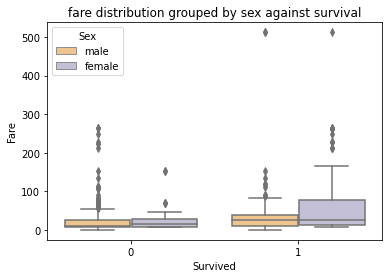

In [12]:
sns.boxplot(y = 'Fare',x='Survived',data = train_data_raw,hue='Sex',palette="PuOr").set_title('fare distribution grouped by sex against survival')

In [47]:
import plotly.figure_factory as ff
figure = ff.create_scatterplotmatrix(
    train_data_nonan[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']],
    diag='histogram',
    index='Survived')
figure.update_layout(
    width=1000,
    height=1000,
)
figure.show()

In [56]:
print(train_data_nonan.dtypes)
print('_______')
print(train_data_nonan.describe())

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object
_______
         Survived      Pclass         Age       SibSp       Parch        Fare
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000
mean     0.406162    2.236695   29.699118    0.512605    0.431373   34.694514
std      0.491460    0.838250   14.526497    0.929783    0.853289   52.918930
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   20.125000    0.000000    0.000000    8.050000
50%      0.000000    2.000000   28.000000    0.000000    0.000000   15.741700
75%      1.000000    3.000000   38.000000    1.000000    1.000000   33.375000
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.329200


In [62]:
# Label encoding for sex
df_temp = train_data_nonan.select_dtypes(include = ['object']).astype('category')
df_temp['Sex_category'] = df_temp['Sex'].cat.codes
# Male = 1; Female = 0.

df_test_data=train_data_nonan.drop(['Sex'],axis=1)
df_test_data['Sex_category'] = df_temp['Sex_category']
print(df_test_data['Sex_category'].value_counts())
df_test_data.head()

1    453
0    261
Name: Sex_category, dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_category
PassengerId,,,,,,,
1,0,3,22.0,1,0,7.2500,1
2,1,1,38.0,1,0,71.2833,0
3,1,3,26.0,0,0,7.9250,0
4,1,1,35.0,1,0,53.1000,0
5,0,3,35.0,0,0,8.0500,1


In [63]:
corrs = df_test_data.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)

figure.update_layout(
    width=1000,
    height=1000,
)
figure.show()

In [82]:
# Split into test and train data (keep my test data for later)
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(df_test_data.drop('Survived', axis=1), df_test_data['Survived'] ,test_size = 0.2, random_state=13)

In [84]:
# Simple decistion tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Tune Decision Tree
num_leaves = [5, 10, 15, 20, 30, 40, 50]
depth = np.arange(3, 21)
num_samples_split = np.arange(10,20)
params_DT = {"max_depth": depth, "min_samples_leaf": num_leaves, "min_samples_split":num_samples_split}
random_state = 42
classifier_DT = DecisionTreeClassifier(random_state=random_state)
grid_DT = GridSearchCV(classifier_DT, params_DT,scoring='roc_auc');
grid_DT.fit(x_train,y_train)

prediction_DT = grid_DT.predict(x_test)
probability_DT = grid_DT.predict_proba(x_test)

In [85]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_DT))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        86
           1       0.85      0.68      0.76        57

    accuracy                           0.83       143
   macro avg       0.83      0.80      0.81       143
weighted avg       0.83      0.83      0.82       143



In [86]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_DT))

Accuracy: 0.8251748251748252


[Text(547.6666666666667, 498.3, 'Fare <= 0.5\nsamples = 100.0%\nvalue = [0.592, 0.408]'),
 Text(310.0, 407.70000000000005, 'Survived <= 2.5\nsamples = 36.4%\nvalue = [0.25, 0.75]'),
 Text(165.33333333333334, 317.1, 'Parch <= 22.0\nsamples = 21.7%\nvalue = [0.048, 0.952]'),
 Text(82.66666666666667, 226.5, 'Pclass <= 29.5\nsamples = 5.6%\nvalue = [0.125, 0.875]'),
 Text(41.333333333333336, 135.89999999999998, 'samples = 2.6%\nvalue = [0.133, 0.867]'),
 Text(124.0, 135.89999999999998, 'samples = 3.0%\nvalue = [0.118, 0.882]'),
 Text(248.0, 226.5, 'Pclass <= 48.5\nsamples = 16.1%\nvalue = [0.022, 0.978]'),
 Text(206.66666666666669, 135.89999999999998, 'Parch <= 127.25\nsamples = 13.5%\nvalue = [0.013, 0.987]'),
 Text(165.33333333333334, 45.299999999999955, 'samples = 10.7%\nvalue = [0.0, 1.0]'),
 Text(248.0, 45.299999999999955, 'samples = 2.8%\nvalue = [0.062, 0.938]'),
 Text(289.33333333333337, 135.89999999999998, 'samples = 2.6%\nvalue = [0.067, 0.933]'),
 Text(454.6666666666667, 317.1, 

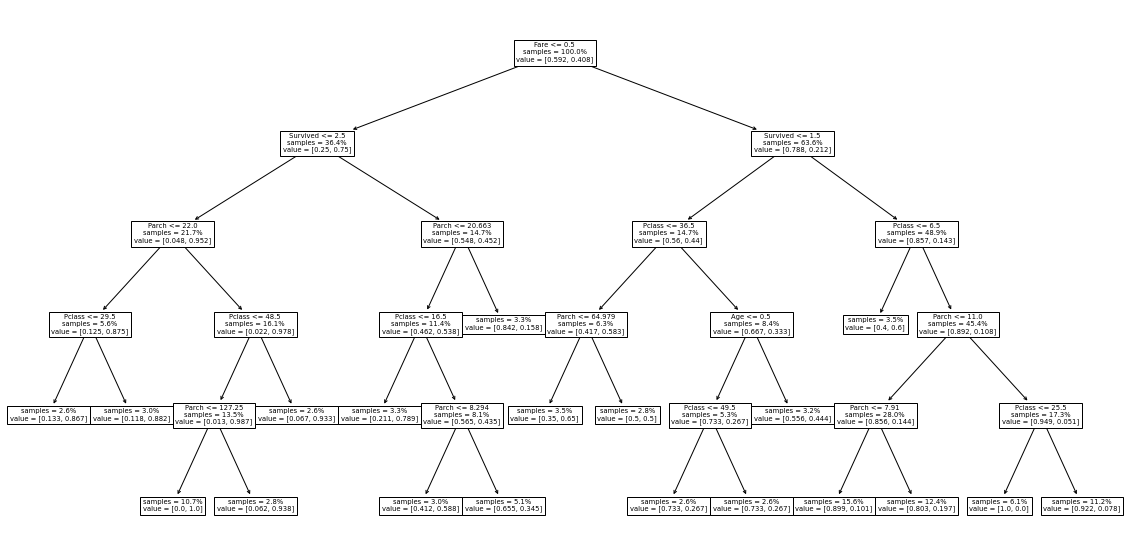

In [87]:
model_DT= grid_DT.best_estimator_
plt.figure(figsize=(20,10)) 
tree.plot_tree(model_DT, feature_names=df_test_data.columns[0:-1], impurity=False, proportion=True)

In [88]:
model_DT

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=10,
                       random_state=42)

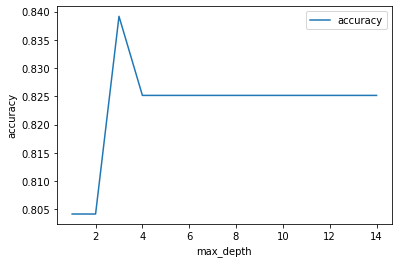

In [90]:
max_depth = []
accuracy = []
for i in range(1,15):
    dtree = DecisionTreeClassifier(min_samples_leaf=15, min_samples_split=10, random_state=42, max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, pred))
    max_depth.append(i)
d = pd.DataFrame({'accuracy':pd.Series(accuracy), 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy', data=d)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()